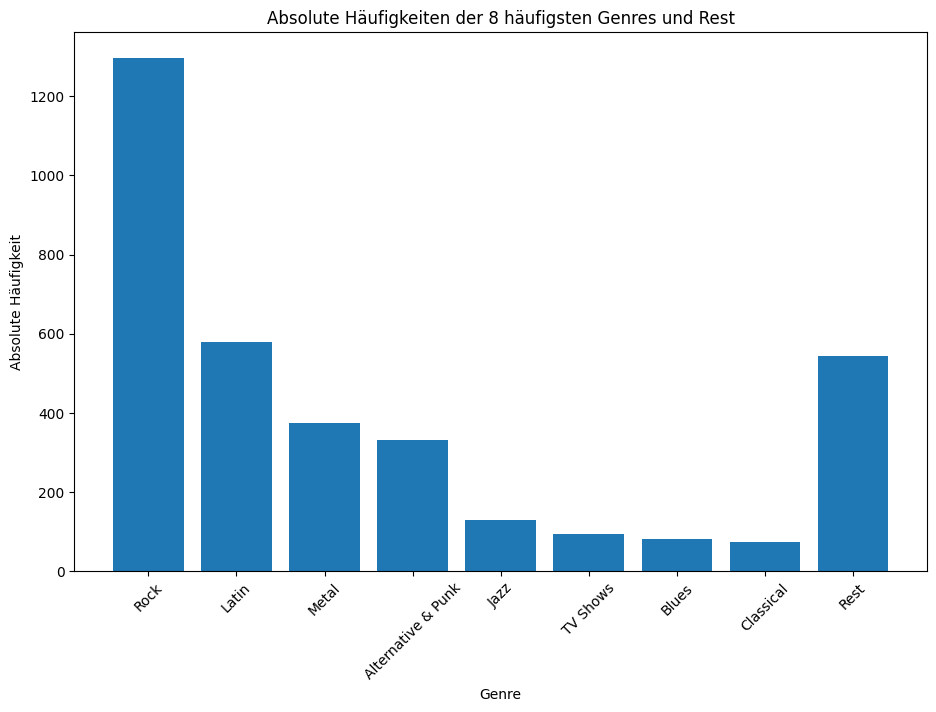

Tabellarische Ausgabe der relativen Häufigkeiten:
Genre           Relative Häufigkeit
Rock            0.37
Latin           0.17
Metal           0.11
Alternative & Punk 0.09
Jazz            0.04
TV Shows        0.03
Blues           0.02
Classical       0.02
Rest            0.16


In [1]:
import csv
import matplotlib.pyplot as plt

itunes_file = "itunes_data.csv"
genre_counts = {}
total_song_count = 0 


with open(itunes_file, 'r', encoding="utf-8", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        genre = row["Genre"]
        total_song_count += 1
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

sortierte_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
top_8_genres = sortierte_genres[:8]

summe_der_8_genres = 0

for genre,count in top_8_genres:
    summe_der_8_genres += count

rest_count = total_song_count - summe_der_8_genres

genre_names = []

for genre, _ in top_8_genres:
    genre_names.append(genre)

genre_names.append("Rest")

genre_counts = []

for _, count in top_8_genres:
    genre_counts.append(count)

genre_counts.append(rest_count)

plt.figure(figsize=(11, 7))
plt.bar(genre_names, genre_counts)
plt.xlabel("Genre")
plt.ylabel("Absolute Häufigkeit")
plt.title("Absolute Häufigkeiten der 8 häufigsten Genres und Rest")
plt.xticks(rotation=45)
plt.show()


relative_frequencies = [count / total_song_count for count in genre_counts]

print("Tabellarische Ausgabe der relativen Häufigkeiten:")
print("{:<15} {:<10}".format("Genre", "Relative Häufigkeit"))
for genre, relative_freq in zip(genre_names, relative_frequencies):
    print("{:<15} {:.2f}".format(genre, relative_freq))